<h1 style="text-align: center;" markdown="1"> Car Features' Effects on Gas Mileage </h1>

<h2 style="text-align: center;" markdown="1"> ECON320 Lab </h2>

<h3 style="text-align: center;" markdown="1"> Jay Chen, Gavin Mason, Jessica Min, Hung Ngo </h3>

## Package Setup

In [2]:
#load packages
import scipy.stats as stats
from IPython.core.display import HTML
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from scipy.optimize import minimize
from datetime import datetime
import plotly as plty
from stargazer.stargazer import Stargazer

## Table of Contents
* [Introduction and Motivation](#anchor1)
* [Data and Decriptive Statistics](#anchor2)
* [Methodology and Empirical Model](#anchor3)
* [References](#anchor4)

## Introduction and Motivation<a class="anchor" id="anchor1"></a>

### Research question: What specific production factors of a vehicle have the largest overall impact on the miles per gallon rate?

According to the Environmental Protection Agency (EPA), the tailpipe Carbon-Dioxide emissions exerted by the combustion of a single gallon of gasoline is measured at 8,887 grams of CO2/gallon. The total emissions of automobiles and trucks was recorded by the EPA as accounting for half of the emissions that serve as ozone precursors, VOCs and NOx, and up to 90% of total CO emissions in urban areas. Due to the fact that 95% of the world's transportation relies on the burning of fossil fuels, it’s no surprise that the transportation sector as a whole accounts for 14% of global CO2 emissions and 27% of US CO2 emissions. 

Carbon Dioxide is relevant to measure as it plays the most important role out of all greenhouse gasses: an assortment of naturally occurring gaseous elements that rest in the atmosphere. These gasses serve an integral purpose through the “greenhouse effect”, a warming component of global temperatures as the gasses absorb heat radiated from the Earth’s surface and then redistribute it across all directions. Without Carbon Dioxide, Earth’s greenhouse effect would be too weak to maintain an average global temperature above freezing. However, increased atmospheric CO2 can have equally disastrous effects on the climate as a higher average global temperature directly equates to increased extinction rates, natural disasters, and decreased agricultural production. 

![alternative text](graph1.jpg)

Signed in 2015 by 196 parties, the Paris Agreement aims to limit global warming through the reduction of overall greenhouse gas emissions with the hopes of reaching global peaking of emissions as soon as possible to achieve a climate neutral world by the mid 21st century. With the transportation industry being the second highest emitter of global CO2 emissions, and with cars and trucks accounting 75% of all transportation sector emissions, it's important to research what contributes the most to these emissions and what factors can limit them. To date, human caused emissions are responsible for increasing atmospheric CO2 density by 50%. 

Automobile mile per gallon (mpg) data serves as an excellent indicator for a specific car model’s effect on CO2 emissions, as a higher mpg vehicle will have lower emissions as it burns fossil fuels at lower rates. Our project aims to promote a cleaner and more stable climate as we will be analyzing what specific mechanical and contextual variables have the most pronounced effect on mpg rates. Determining what production factors play the largest roles in fuel-efficiency will give an indication as to the manner in which future vehicle manufacturing trends should head. 

![alternative text](graph2.jpg)

## Data and Descriptive Statistics<a class="anchor" id="anchor2"></a>

We will be using a dataset sourced from University of California Irvine's Machine Learning Depository database. The dataset consists of 398 total observations, 8 variables, and one column of strings that are unique to each observation. Out of these 8 variables, the dependent variable will be vehicle city-cycle MPG, with 7 independent variables based on each car model: cylinders (multi-valued discrete), displacement (continuous), horsepower (continuous), weight in lbs (continuous), acceleration (continuous), model year in the 1900s (multi-valued discrete), and country of origin (multi-valued discrete). 

The dataset consists only of a population of cars manufactured between 1970-1982. Ever since the EPA began a more intense surveillance of vehicular emissions, it's true that cars have seen a slight but steady decline in terms of their overall emissions.  However, this dataset will still hold as relevant to contemporary vehicles due to the nature of our research question. Since we are analyzing a research question of what mechanical or geographical components have the largest effect on a vehicle's city-cycle MPG, the fact that cars have shown trends towards increased efficiency is mostly irrelevant to our focus. 

In [7]:
# import data and load into DataFrame
data = pd.read_excel('AutoDataClean.xlsx')
# let's see if our the attributes of our data have their predicted type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   modelyear     398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


### Cleaning up the data -- "origin" and "name"

In [8]:
# the car model is the only outlier, and we can truthfully drop it from our data as we are only concerned with the specific, quantitative variables
data = data.drop('name',axis=1)
# let's do the same with variable "origin" 
data = data.drop('origin',axis=1)
# visualising summary statistics across measurable variables
data.describe().round(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear
count,398.000,398.000,398.000,398.000,398.000,398.000,398.000
mean,23.515,5.455,193.426,104.171,2970.425,15.568,76.010
std,7.816,1.701,104.270,38.363,846.842,2.758,3.698
min,9.000,3.000,68.000,46.000,1613.000,8.000,70.000
25%,17.500,4.000,104.250,75.000,2223.750,13.825,73.000
50%,23.000,4.000,148.500,92.500,2803.500,15.500,76.000
75%,29.000,8.000,262.000,125.000,3608.000,17.175,79.000
max,46.600,8.000,455.000,230.000,5140.000,24.800,82.000


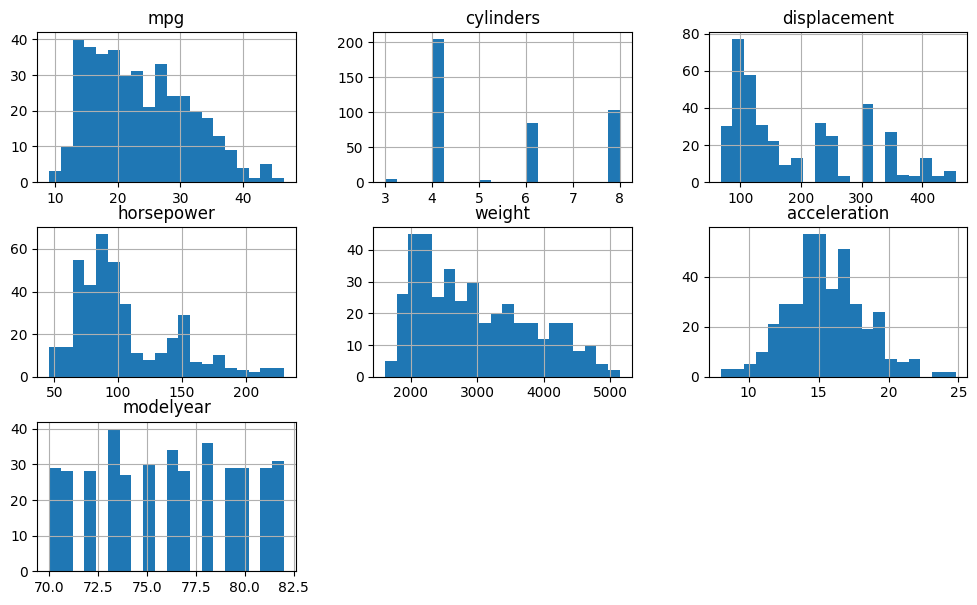

In [9]:
# let's better visualize the frequency of these attributes
data.hist(figsize=(12,7),bins=20)
plt.show()

## Methodology and Empirical Model<a class="anchor" id="anchor3"></a>

Our population model is:
$$\begin{equation}
mpg = b_0 + b_1*cy + b_2*dis + b_3*hor + b_4*we + b_5*acc + b_6*my + u
\end{equation}
$$

Whereas our estimation model:
$$\begin{equation}
mpg = \widehat{b_0} + \widehat{b_1}*cy + \widehat{b_2}*dis + \widehat{b_3}*hor + \widehat{b_4}*we + \widehat{b_5}*acc + \widehat{b_6}*my
\end{equation}
$$

Where 
mpg: miles per gallon,
 cy: cylinders,
 dis: displacement, 
 hor: horsepower, 
 we: weight, 
 acc: acceleration, 
 my: model year,


To deal with the greenhouse effect, we want to have higher miles per gallon which will lessen the amount of emitted greenhouse gases. Through our model, we will explore what significantly impacts the miles per gallon (mpg) among our six independent variables. Thus, we can suggest alternatives to increase the value of mpg which, as a result, will slow down climate change globally. 

To measure the impact of each independent variable on the dependent variable, we will use the natural logarithm. We are curious about how a one percent change in each independent variable corresponds to the percent change in the dependent variable. From that result, we will know which independent variables affect mpg the most. 

$$\begin{equation}
ln(mpg) = \widehat{b_0} + \widehat{b_1}*ln(cy) + \widehat{b_2}*ln(dis) + \widehat{b_3}*ln(hor) + \widehat{b_4}*ln(we) + \widehat{b_5}*ln(acc) + \widehat{b_6}*ln(my)
\end{equation}
$$

## References<a class="anchor" id="anchor4"></a>

https://www.epa.gov/ghgemissions/inventory-us-greenhouse-gas-emissions-and-sinks

https://www.epa.gov/ghgemissions/sources-greenhouse-gas-emissions

https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide

https://climate.nasa.gov/vital-signs/carbon-dioxide/